<a href="https://colab.research.google.com/github/modichirag/flowpm/blob/notebooks/flowpm_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/modichirag/flowpm.git
!git clone https://github.com/modichirag/flowpm.git 

  Cloning https://github.com/modichirag/flowpm.git (to revision u/EiffL/ops) to /tmp/pip-req-build-xuyztc8y
  Running command git clone -q https://github.com/modichirag/flowpm.git /tmp/pip-req-build-xuyztc8y
  Running command git checkout -b u/EiffL/ops --track origin/u/EiffL/ops
  Switched to a new branch 'u/EiffL/ops'
  Branch 'u/EiffL/ops' set up to track remote branch 'u/EiffL/ops' from 'origin'.
  Created wheel for flowpm: filename=flowpm-0.1-cp36-none-any.whl size=11362 sha256=66fe31cea77267a9561008082afb8ec603bf0ec2c5270abfbcbce315a3ab3e03
  Stored in directory: /tmp/pip-ephem-wheel-cache-26dim9f3/wheels/a7/cf/46/38a5d061a8e3218031be48fd77d3c4c096624b1b1497197fe3
Successfully built flowpm


In [6]:
%pylab inline
from flowpm import linear_field, lpt_init, nbody, cic_paint
import tensorflow as tf
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline

klin = np.loadtxt('flowpm/flowpm/data/Planck15_a1p00.txt').T[0]
plin = np.loadtxt('flowpm/flowpm/data/Planck15_a1p00.txt').T[1]

ipklin = iuspline(klin, plin)

Populating the interactive namespace from numpy and matplotlib


In [7]:
import flowpm

stages = np.linspace(0.1, 1.0, 10, endpoint=True)

initial_conditions = flowpm.linear_field(32,          # size of the cube
                                         100,         # Physical size of the cube
                                         ipklin,      # Initial powerspectrum
                                         batch_size=16)

# Sample particles
state = flowpm.lpt_init(initial_conditions, a0=0.1)   

# Evolve particles down to z=0
final_state = flowpm.nbody(state, stages, 32)         

# Retrieve final density field
final_field = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state[0])

with tf.Session() as sess:
    sim = sess.run(final_field)

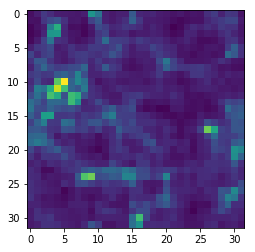

In [8]:
imshow(sim[0].sum(axis=0))